## Paired View Evaluation Results

In [2]:
import torch
import os
from tqdm import tqdm

from dataloader import create_dataloader
from models import ASClassifier
from utils import get_split_file, label_mapping

from evaluation import *
from test_model import test


os.environ['CUDA_VISIBLE_DEVICES'] = "1"

In [3]:
# Loading model and run on test data
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 16
mode = "paired_view"
# Define view weights
view_weights = {"psax": 0.51685, "plax": 0.5155625}

# Initialize the model
model = ASClassifier(device=device, view_weights=view_weights)
model_path = "checkpoints/paired_view_classifier_3.pth"
model.load_state_dict(torch.load(model_path))

# Create the dataloaders
test_data_loader = create_dataloader(get_split_file('test'), batch_size=batch_size, mode="paired_views",
                                     num_workers=1)

# Print statistics
print(f'Test dataloader with len of {len(test_data_loader)} and batch size of {batch_size} loaded.')

gt, predicted = test(model, test_data_loader, device, label_mapping,mode)
print(gt.shape)
print(predicted.shape)

/raid/home/matin.daghyani/code/EECE571-project/models.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("EchoPrime/model_data/weights/echo_prime_e

Test dataloader with len of 21 and batch size of 16 loaded.


Testing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [01:15<00:00,  3.58s/it]

torch.Size([328])
torch.Size([328])


In [4]:
# Map integer labels to class names
from utils import label_mapping

gt_numpy = gt.detach().cpu().numpy()
predicted_numpy = predicted.detach().cpu().numpy()
reverse_mapping = {value: key for key, value in label_mapping.items()}
true_labels = [reverse_mapping[label_index] for label_index in gt_numpy]
predicted_labels = [reverse_mapping[label_index] for label_index in predicted_numpy]

In [5]:
# Calculate metrics
accuracy = calculate_accuracy(true_labels, predicted_labels)
f1 = calculate_f1(true_labels, predicted_labels)
precision = calculate_precision(true_labels, predicted_labels)
recall = calculate_recall(true_labels, predicted_labels)
conf_matrix = generate_confusion_matrix(true_labels, predicted_labels)
class_report = generate_classification_report(true_labels, predicted_labels)

In [6]:
# Display results
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", class_report)

Accuracy: 0.7621951219512195
F1 Score: 0.7117419670812124
Precision: 0.716179385244721
Recall: 0.7102343855701998

Classification Report:
               precision    recall  f1-score   support

        mild       0.68      0.59      0.63        73
    moderate       0.53      0.49      0.51        61
      normal       0.88      0.96      0.92       138
      severe       0.78      0.80      0.79        56

    accuracy                           0.76       328
   macro avg       0.72      0.71      0.71       328
weighted avg       0.75      0.76      0.76       328



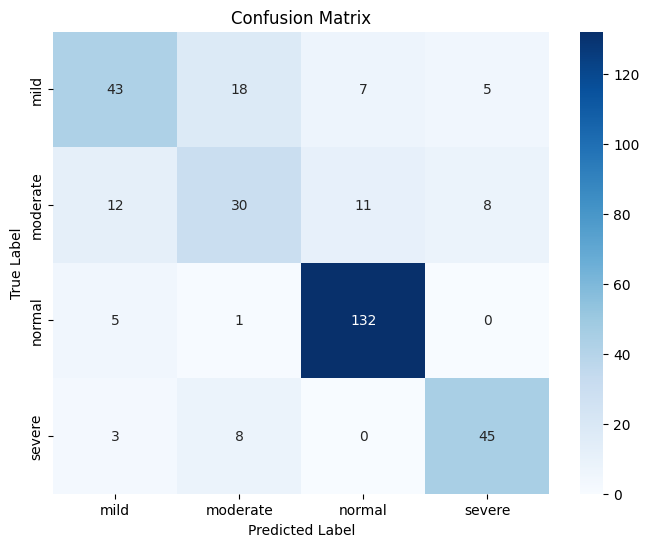

In [7]:
from evaluation import plot_confusion_matrix
cm = generate_confusion_matrix(true_labels, predicted_labels)
labels = sorted(list(set(true_labels)))
plot_confusion_matrix(cm, labels)